MODEL COMPARISON TABLE
                 aic         bic  r_squared  n_params  n_obs
model                                                       
Simple     79.372163   84.582504   0.737255         2    100
Multiple -161.386841 -153.571331   0.976813         3    100
Full     -159.495085 -149.074405   0.976838         4    100


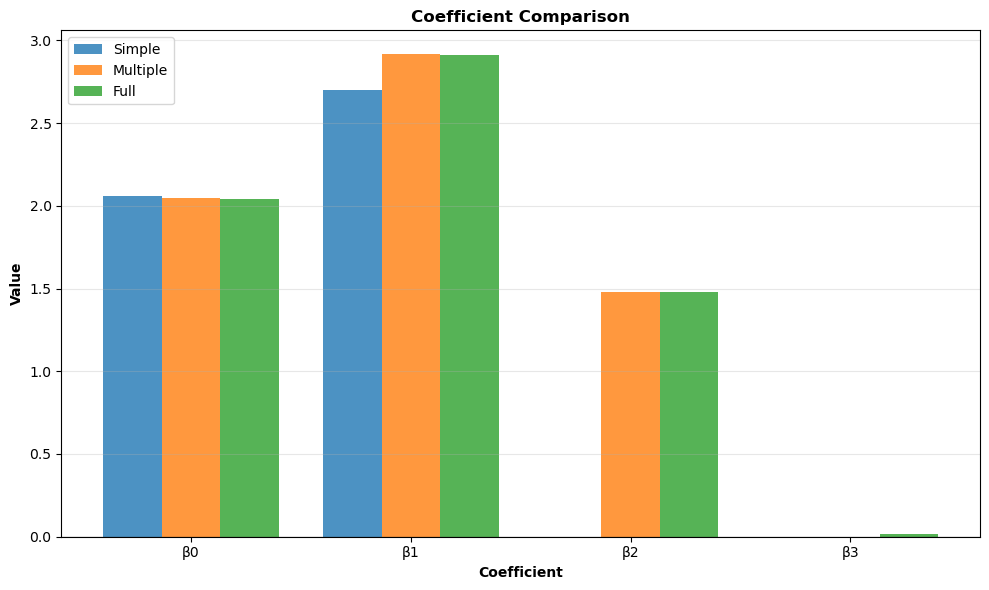

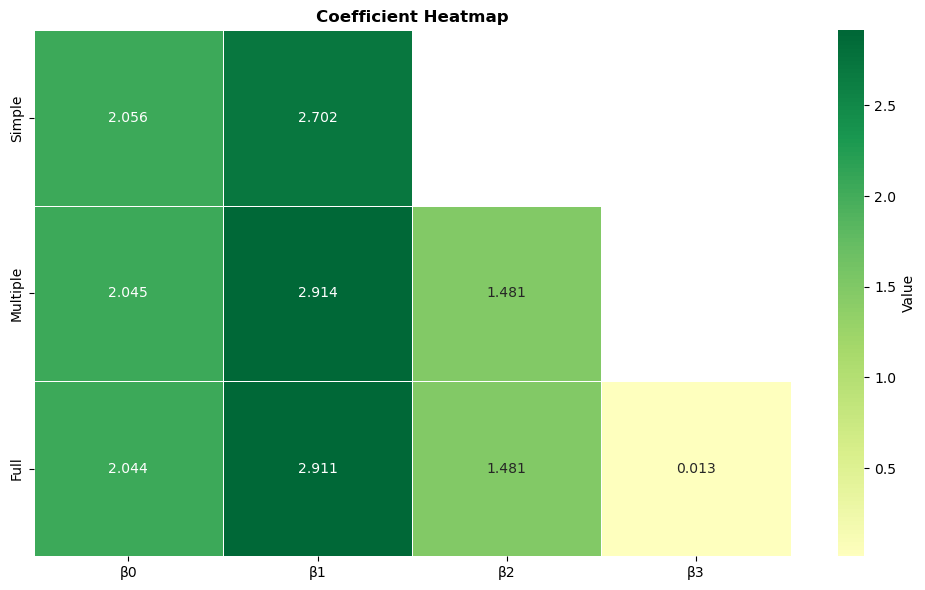

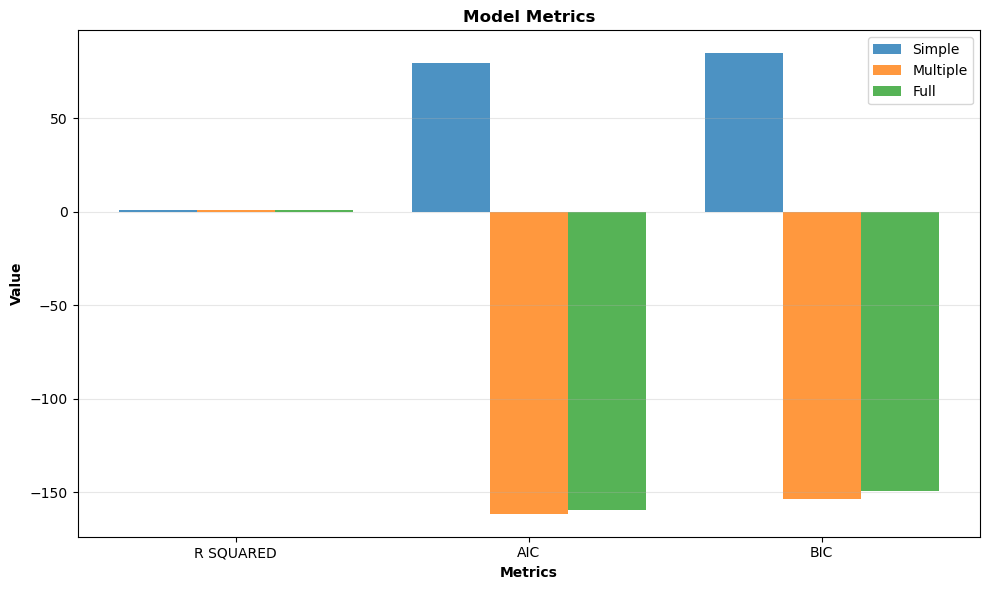

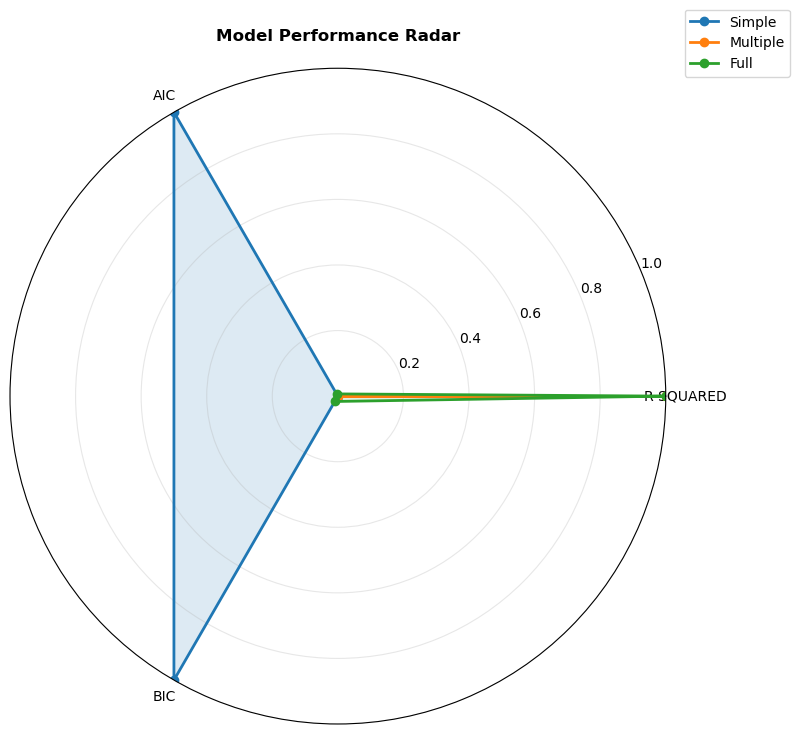

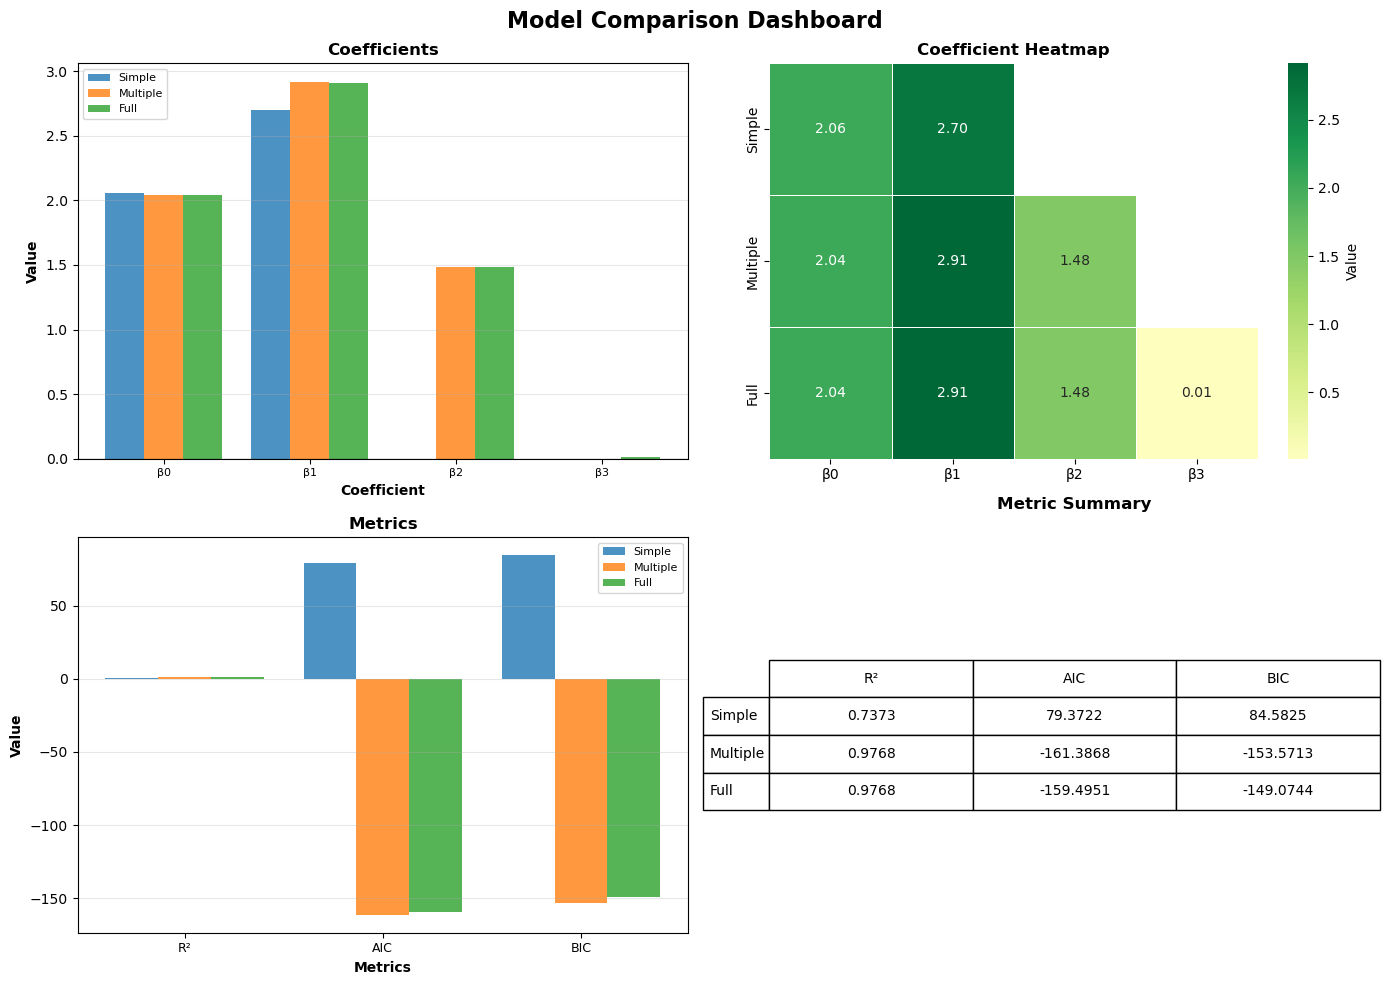


BEST MODEL SUMMARY (Multiple)
Call: EasyLM LinearModel

Observations: 100
Parameters: 3
Degrees of Freedom (resid): 97

Coefficients:
   Coef.  Std.Err.  t value  Pr(>|t|)
0 2.0450    0.0443  46.2044    0.0000
1 2.9144    0.0491  59.3352    0.0000
2 1.4807    0.0468  31.6569    0.0000

Residual variance (sigma^2): 0.1933
R-squared: 0.9768
AIC: -161.3868
BIC: -153.5713


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from EasyLM import LinearModel, ModelComparator, PlotHelper

# 1. GENERATE DATA
np.random.seed(42)
n = 100
X1 = np.random.randn(n)
X2 = np.random.randn(n)
X3 = np.random.randn(n)
y = 2 + 3*X1 + 1.5*X2 + np.random.randn(n) * 0.5

# 2. FIT MODELS
# Simple model (1 predictor)
model1 = LinearModel()
model1.fit(X1.reshape(-1, 1), y)
model1.name = "Simple"

# Multiple regression (2 predictors)
model2 = LinearModel()
model2.fit(np.column_stack([X1, X2]), y)
model2.name = "Multiple"

# Full model (3 predictors)
model3 = LinearModel()
model3.fit(np.column_stack([X1, X2, X3]), y)
model3.name = "Full"

# 3. STATISTICAL COMPARISON
print("="*60)
print("MODEL COMPARISON TABLE")
print("="*60)
comparator = ModelComparator([model1, model2, model3])
print(comparator.compare())

# 4. VISUALIZE COMPARISONS (One-liners)

# Coefficient comparison
PlotHelper.coef_plot(model1, model2, model3)
PlotHelper.coef_plot(model1, model2, model3, style='heatmap')

# Metric comparison
PlotHelper.metric_plot(model1, model2, model3)
PlotHelper.metric_plot(model1, model2, model3, style='radar')

# Complete dashboard
PlotHelper.compare(model1, model2, model3)

# Show all plots at once
plt.show()

# 5. INDIVIDUAL MODEL SUMMARY
print("\n" + "="*60)
print("BEST MODEL SUMMARY (Multiple)")
print("="*60)
print(model2.summary())